<a href="https://colab.research.google.com/github/Geerford/data-science-ipynb/blob/master/Principal%20component%20analysis/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение базовых библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Подключим gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/Data Science/Principal component analysis'

/content/drive/My Drive/Colab Notebooks/Data Science/Principal component analysis


#Уменьшение размерности

Считываем датасет

In [ ]:
df = pd.read_csv('mgk.csv', header=None)

Уменьшение размерности. Параметр svd_solver отвечает за метод оптимизации,  n_components - количество главных компонент.
`X_transformed` - ndarray объектов, где каждый объект описывается заданным ранее числом главных компонент (в данном случае 2)

In [ ]:
pca = PCA(n_components=2, svd_solver='full')
X_transformed = pca.fit(df).transform(df)
print(X_transformed)

[[ 22.90768784 -14.30123929]
 [-16.06897804  35.65216288]
 [ 35.92512747   5.44744293]
 [ 33.9576993    6.09042439]
 [-15.22324272  39.89044149]
 [ -8.3396631   -3.87608347]
 [-14.91049858  37.41457292]
 [-11.60687177  -5.50019527]
 [-12.56536097  -7.08884825]
 [ -9.74808826  -3.84952392]
 [ -9.34548701  -4.44152189]
 [ 35.88344391   7.27968896]
 [-32.06163215 -22.5208281 ]
 [-16.49542103  39.38373475]
 [-10.85727582  -3.87940321]
 [ 24.15207816 -13.86464394]
 [ 35.79449726   6.47490327]
 [-30.91190764 -25.75949219]
 [-31.29578077 -24.2950086 ]
 [-10.49217308  -5.04555461]
 [-17.05049705  39.79978691]
 [-32.31482456 -23.21485318]
 [-32.147156   -23.66918643]
 [ -7.82538011  -3.7779587 ]
 [-14.80939139  36.40596374]
 [ 33.78834984   7.78888236]
 [-18.05695826  38.86565033]
 [ 34.61485076   4.99844035]
 [ 24.08031487 -18.53742438]
 [ 37.89698436   5.65084362]
 [-34.22323108 -22.03353381]
 [ 30.09345431   5.25611849]
 [ 23.78115086 -17.23849214]
 [ 33.94138532   2.63390951]
 [ 33.61258916

Изображение 60 объектов на диаграмме рассеивания

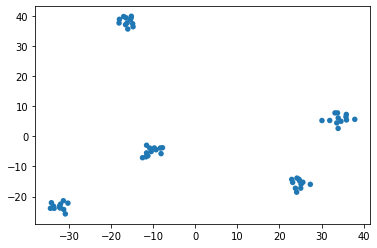

In [ ]:
plt.scatter(X_transformed[:60, 0], X_transformed[:60, 1], edgecolor='none', s=30, cmap='winter')

Доля объясненной дисперсии от количества используемых главных компонент

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
print(explained_variance)
print(explained_variance[-1])

[0.459 0.79 ]
0.79


График зависимости доли объясненной дисперсии от количества главных компонент


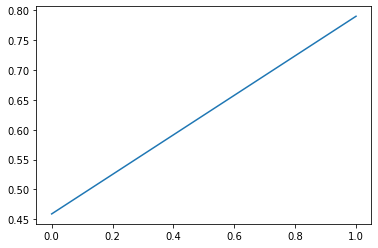

In [ ]:
plt.plot(np.arange(2), explained_variance, ls = '-')

Повторим эксперимент для 10 главных компонент

In [ ]:
pca = PCA(n_components=10, svd_solver='full')
X_transformed = pca.fit(df).transform(df)
print(X_transformed)

[[ 2.29076878e+01 -1.43012393e+01 -8.60588282e+00  1.26818103e+01
   1.61360306e+00  1.23067498e-01  9.22777624e-01 -5.61956635e-01
   1.04879661e+00 -7.19294055e-01]
 [-1.60689780e+01  3.56521629e+01 -8.22307703e+00  2.07503194e+00
   8.67072105e-02  2.29277062e+00 -1.14523069e+00 -3.82480176e-01
  -1.21680371e+00 -2.63409859e-01]
 [ 3.59251275e+01  5.44744293e+00  2.60693510e-01 -1.34791688e+01
  -2.60477995e+00 -7.88742230e-01  8.30012140e-02  1.31634708e+00
  -3.70417621e-01  2.95683464e-01]
 [ 3.39576993e+01  6.09042439e+00 -1.48145072e+00 -1.52562098e+01
  -1.67587284e+00 -4.10426982e-01  9.59442696e-01  1.53840770e+00
  -1.66888207e+00 -1.31174394e+00]
 [-1.52232427e+01  3.98904415e+01 -8.47086641e+00  3.92893676e+00
  -1.94394141e+00 -1.64609893e+00  1.70985933e+00 -5.81570974e-01
  -4.76952991e-01 -1.24033690e+00]
 [-8.33966310e+00 -3.87608347e+00  2.48419821e+01  7.00143763e-01
  -1.90297412e+00  1.66028991e+00 -3.32790257e+00  5.45532899e-01
   5.04003095e-01 -2.28068311e+00

[0.459 0.79  0.92  0.992 0.994 0.996 0.997 0.998 0.999 1.   ]
1.0


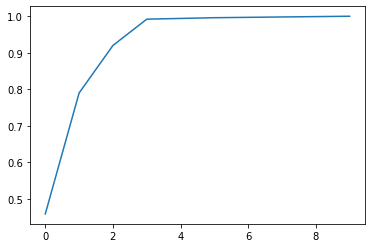

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
print(explained_variance)
print(explained_variance[-1])
plt.plot(np.arange(10), explained_variance, ls='-')
plt.show()


#Восстановление исходного изображения

Считываем датасет счетов и весов

In [ ]:
scores = np.genfromtxt('mgk_X_reduced.csv', delimiter=';')
loadings = np.genfromtxt('mgk_X_loadings.csv', delimiter=';')

Матрица восстановленных данных → произведение матрицы счетов на транспонированную матрицу весов.


In [ ]:
values = np.dot(scores, loadings.T)
print(values)

[[1.13031992e-14 1.09019050e-13 3.67543477e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13031992e-14 1.09019050e-13 3.67543477e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13031992e-14 1.09019050e-13 3.67543477e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.13031992e-14 1.09019050e-13 3.67543477e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13031992e-14 1.09019050e-13 3.67543477e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13031992e-14 1.09019050e-13 3.67543477e-15 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Создадим изображение на основе полученных данных

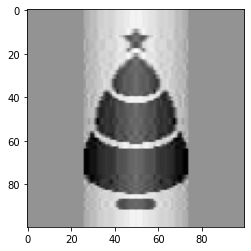

In [ ]:
plt.imshow(values, cmap='Greys_r')
plt.show()